## Data Analysis And Machine Learning on Campus Placement Data

- **Explatory Data Analysis**
- **Prediction of wheather student gets placed or not (Binary Classification)**
- **Determining characteristics affecting placement**
- **Predition of Salary secured by a student (Regression)**
- **Determining characteristics affecting salary**

# Library Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
data = pd.read_csv("Placement_Data_Full_Class.csv")
#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

# Exploratory Data Analysis

## Exploring Data by each Features

### Feature: Gender
#### Does gender affect placements?

In [4]:
data.gender.value_counts()
# Almost double

M    139
F     76
Name: gender, dtype: int64

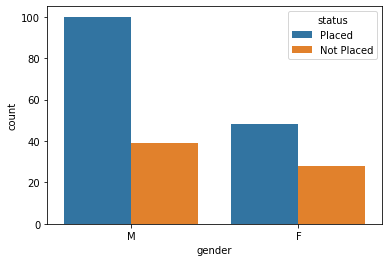

In [5]:
sns.countplot("gender", hue="status", data=data)
plt.show()

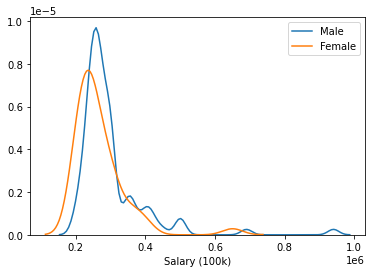

In [6]:
#This plot ignores NaN values for salary, igoring students who are not placed
sns.kdeplot(data.salary[ data.gender=="M"])
sns.kdeplot(data.salary[ data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

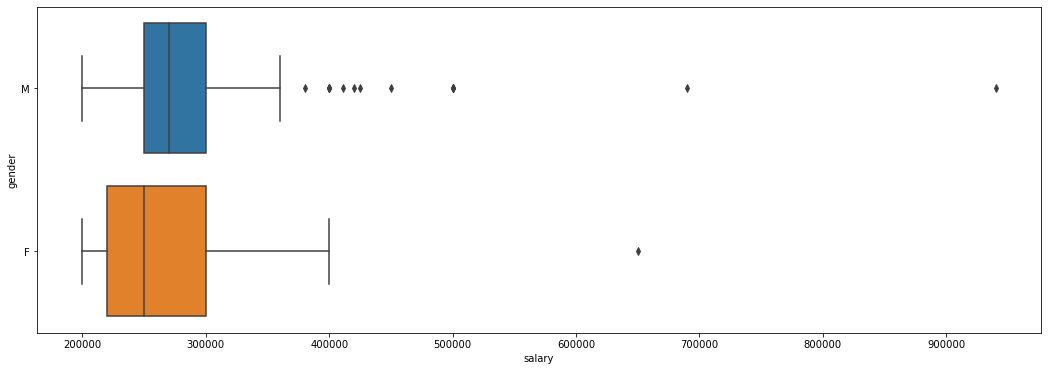

In [7]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

#### Insights

* We have samples of 139 Male studets and 76 Female students.
* 30 Female and 40 Male students are not placed. Male students have comparatively higher placemets. 
* More outliers on Male -> Male students are getting high CTC jobs.
* Male students are offered slightly greater salary than female on an average. 


### Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)
#### Does Secondary Education affect placements?

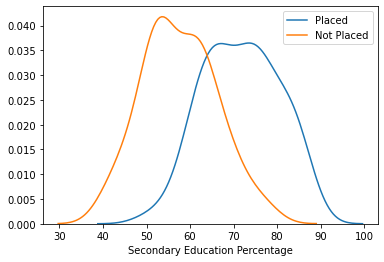

In [8]:
#Kernel-Density Plot
sns.kdeplot(data.ssc_p[ data.status=="Placed"])
sns.kdeplot(data.ssc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

* All students with Secondary Education Percentage above 90% are placed
* All students with Secondary Education Percentage below 50% are not-placed
* **Students with good Secondary Education Percentage are placed on average.**

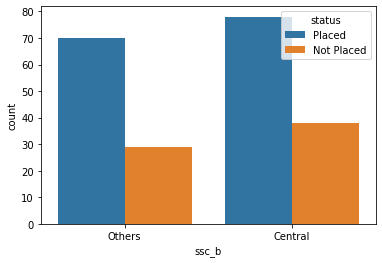

In [9]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

* Board Of Education does not affect Placement Status much

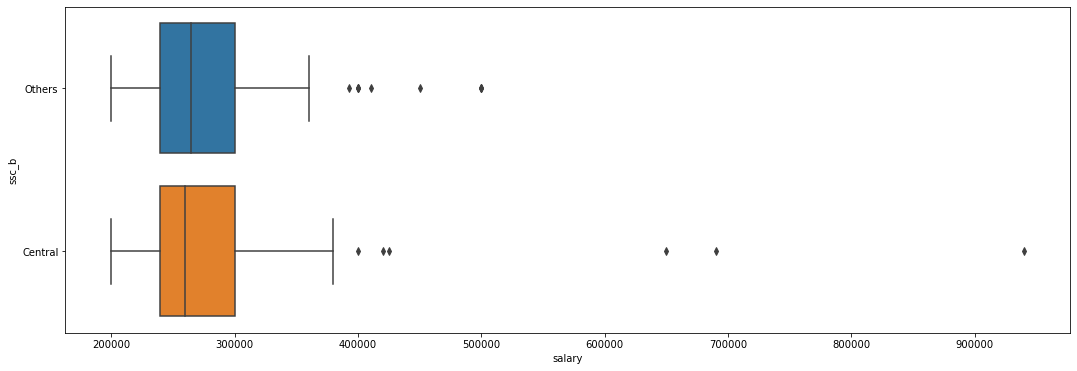

In [10]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

* Outliers on both, but students from Central Board are getting the highly paid jobs.

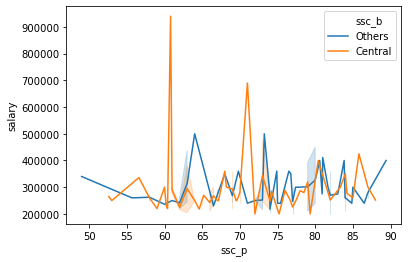

In [11]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

* No specific pattern (correlation) between Secondary Education Percentage and Salary.
* Board of Education is Not Affecting Salary

### Feature: hsc_p (Higher Secondary Education percentage), hsc_b (Board Of Education), hsc_s (Specialization in Higher Secondary Education)
#### Does Higher Secondary School affect Placements?

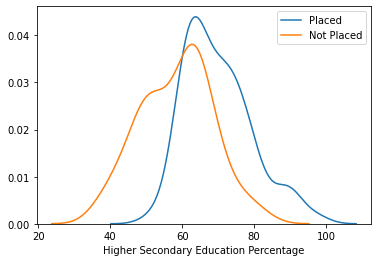

In [12]:
#Kernel-Density Plot
sns.kdeplot(data.hsc_p[ data.status=="Placed"])
sns.kdeplot(data.hsc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

* Overlap here too. More placements for percentage above 65%
* Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed

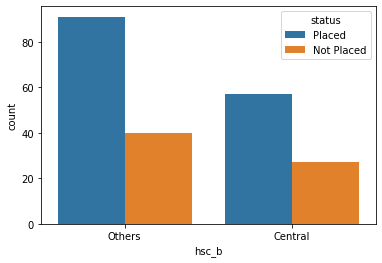

In [13]:
sns.countplot("hsc_b", hue="status", data=data)
plt.show()

Education Board again, doesn't affect placement status much

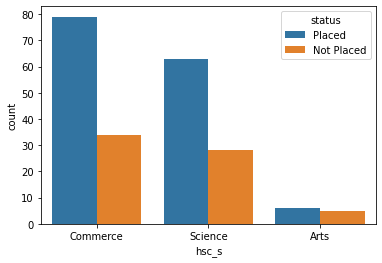

In [14]:
sns.countplot("hsc_s", hue="status", data=data)
plt.show()

* We have very less students with Arts specialization.
* Around 2:1 placed:unplaced  ratio for both Science and Commerse students


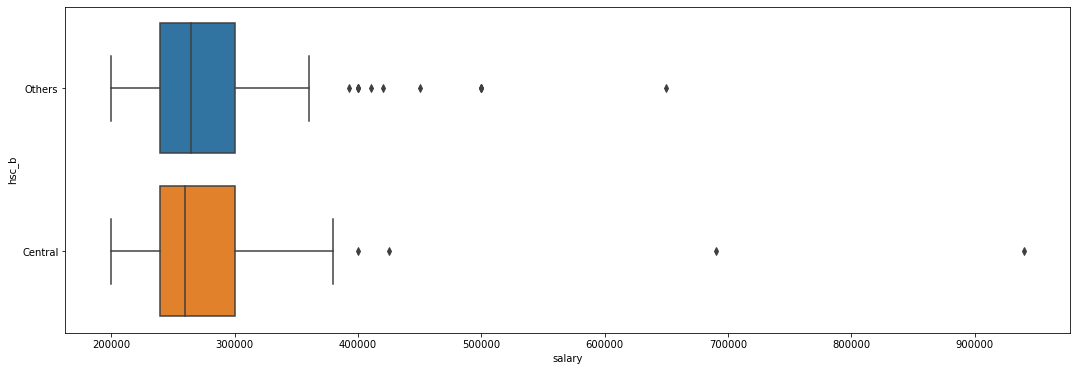

In [15]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_b", data=data)
plt.show()

* Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student from Central Board though.

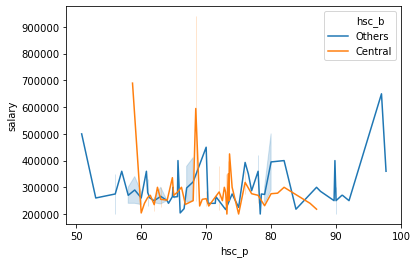

In [16]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=data)
plt.show()

* High salary from both Central and Other. 
* High salary for both high and low percentage.
* Thus, both these feature doesnot affect salary.

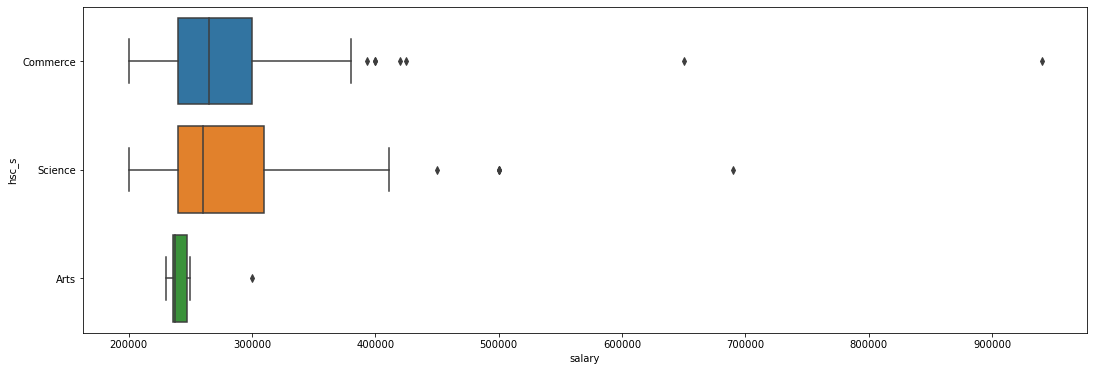

In [17]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=data)
plt.show()

* We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.

* Commerse students have slightly better placement status.

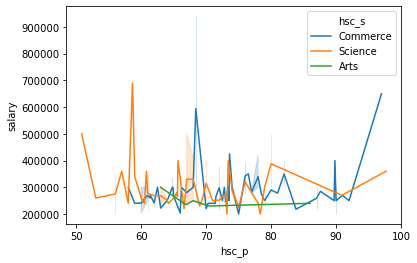

In [18]:
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=data)
plt.show()

* **Student with Art Specialization surprisingly have comparatively low salary**

### Feature: degree_p (Degree Percentage), degree_t (Under Graduation Degree Field)
#### Does Under Graduate affect placements? 

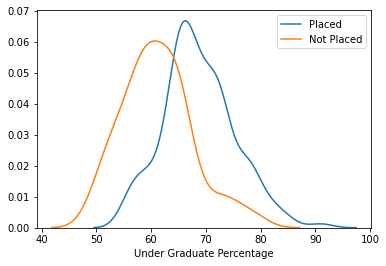

In [19]:
#Kernel-Density Plot
sns.kdeplot(data.degree_p[ data.status=="Placed"])
sns.kdeplot(data.degree_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

* Overlap here too. But More placements for percentage above 65.
* UG Percentage least 50% to get placement

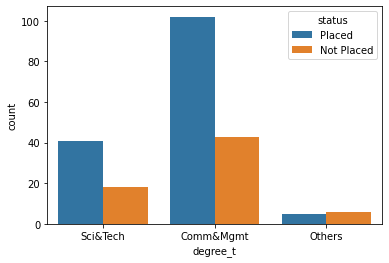

In [20]:
sns.countplot("degree_t", hue="status", data=data)
plt.show()

* We have very less students with "Other". We cant make decision from few cases.
* Around 2:1 placed:unplaced  ratio for both Science and Commerse students

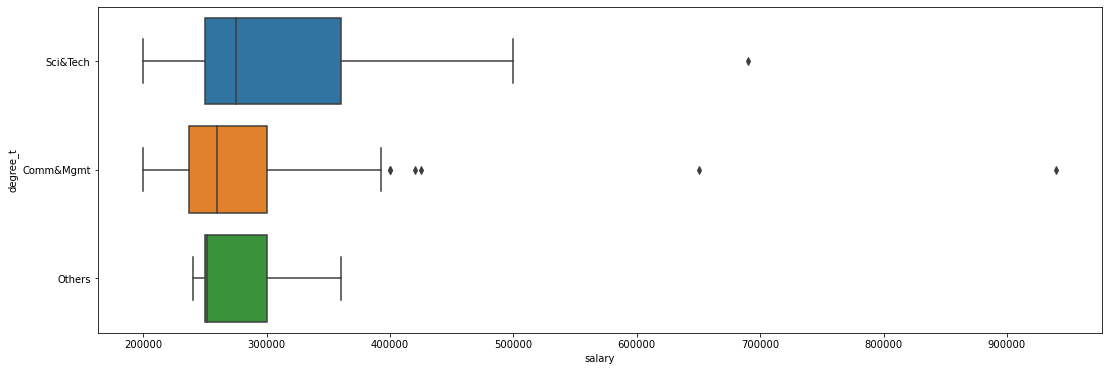

In [21]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=data)
plt.show()

* Science&Tech students getting more salary on average
* Management stidents are getting more highly paid dream jobs. 

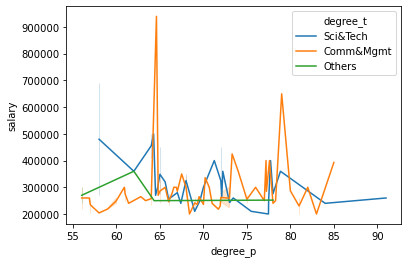

In [22]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=data)
plt.show()

* Percentage does not seem to affect salary.
* Commerce&Mgmt students occasionally get dream placements with high salary

### Feature: workex (Work Experience)
#### Does Work Experience affect placements?

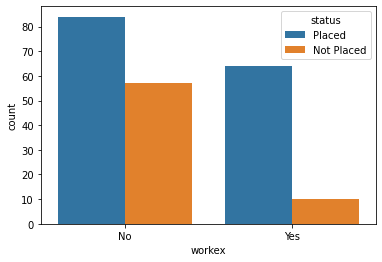

In [23]:
sns.countplot("workex", hue="status", data=data)
plt.show()

* **This affects Placement.** Very few students with work experience not getting placed!

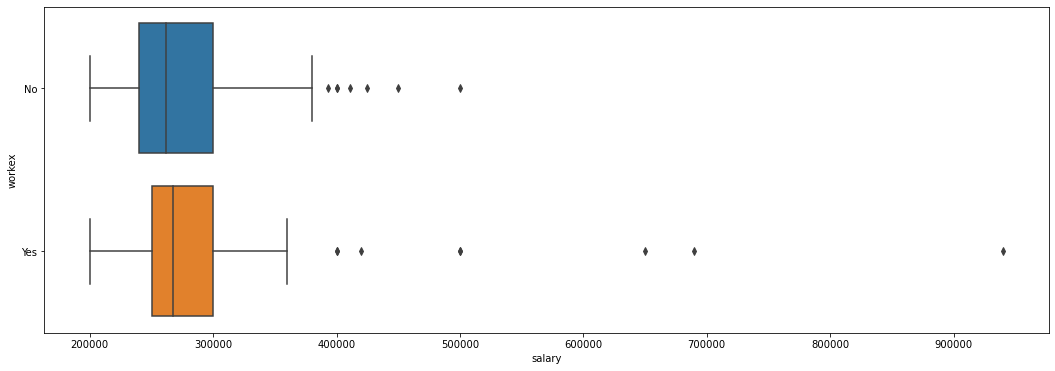

In [24]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=data)
plt.show()

* Outliers (High salary than average) on bith end but **students with experience getting dream jobs**
* Average salary as well as base salary high for students with work experience.

### Feature: etest_p  (Employability test percentage)

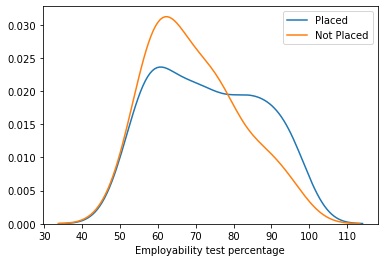

In [25]:
#Kernel-Density Plot
sns.kdeplot(data.etest_p[ data.status=="Placed"])
sns.kdeplot(data.etest_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

* High overlap -> It does not affect placement status much
* More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

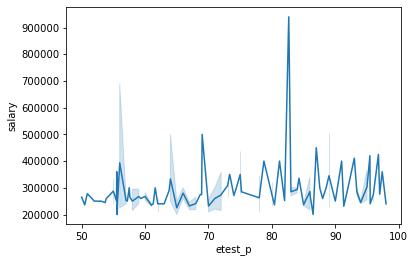

In [26]:
sns.lineplot("etest_p", "salary", data=data)
plt.show()

**This feature surprisingly does not affect placements and salary much**

### Feature: specialisation (Post Graduate Specialization)

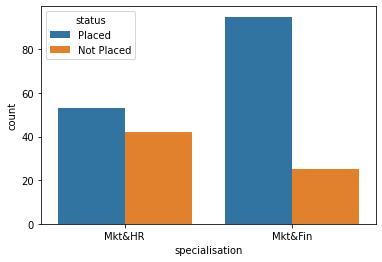

In [27]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()

* This feature affects Placement status.
* Comparitively very low not-placed students in Mkt&Fin Section

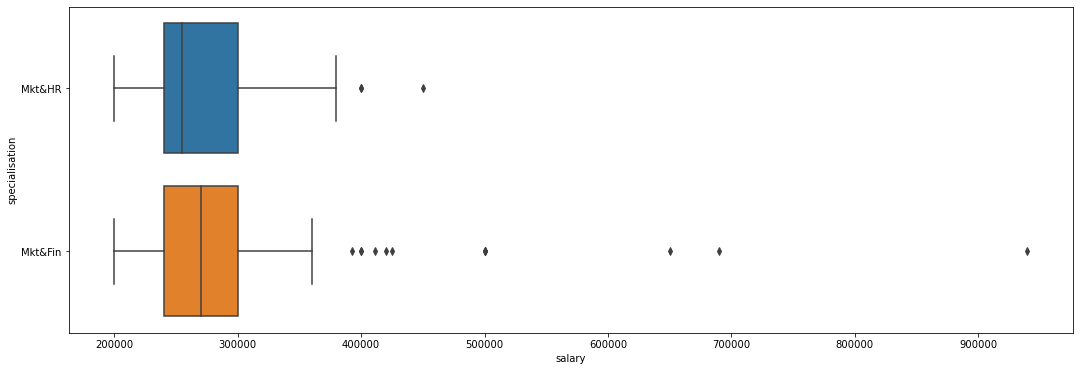

In [28]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "specialisation", data=data)
plt.show()

* **More Highly Paid Jobs for Mkt&Fin students **

### Feature: mba_p (MBA percentage)
#### Does MBA Percentage affect placements?

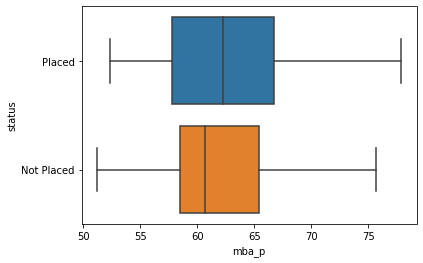

In [29]:
sns.boxplot("mba_p", "status", data=data)
plt.show()

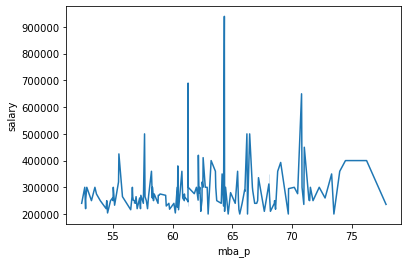

In [30]:
sns.lineplot("mba_p", "salary", data=data)
plt.show()

MBA Percentage also deos not affect salary much

# Feature Selection

Using Only following features (Ignoring Board of Education -> they didnt seem to have much effect)
* Gender
* Secondary Education percentage
* Higher Secondary Education Percentsge
* Specialization in Higher Secondary Education
* Under Graduate Dergree Percentage
* Under Graduation Degree Field
* Work Experience
* Employability test percentage
* Specialization
* MBA Percentage

Will compute feature importance later on.
